<a href="https://colab.research.google.com/github/louispaulet/randomForestClassifierVisualizationProject/blob/main/WineRandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#imports
# import matplotlib
# matplotlib.use('TkAgg')

%matplotlib inline

%matplotlib --list

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


In [45]:
# attributes from :
# http://archive.ics.uci.edu/ml/datasets/Wine

# 1) Alcohol
# 2) Malic acid
# 3) Ash
# 4) Alcalinity of ash  
# 5) Magnesium
# 6) Total phenols
# 7) Flavanoids
# 8) Nonflavanoid phenols
# 9) Proanthocyanins
# 10)Color intensity
# 11)Hue
# 12)OD280/OD315 of diluted wines
# 13)Proline 

cols = [
'Class',
'Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash',
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'protein content',
'Proline',
]

wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                        sep=',', names=cols, header=None, encoding='latin-1')

wine

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,protein content,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


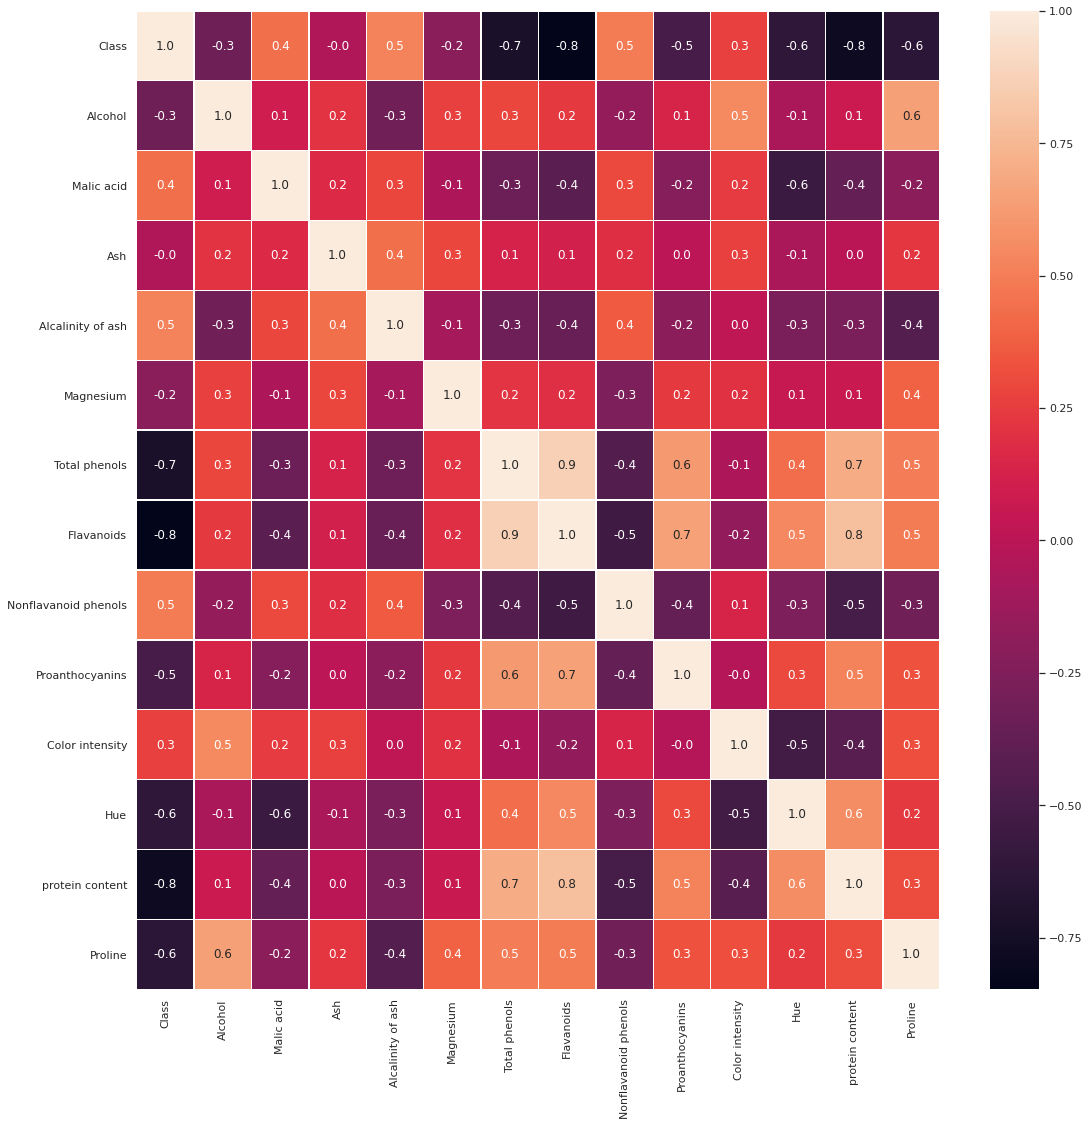

In [46]:
f,ax = plt.subplots(figsize=(18, 18))
ax = sns.heatmap(wine.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax

In [47]:
#we want to separate the data into the prediction class and the atributes
#here we are trying to predict class "no-recurrence-event" vs "recurrence-events"

x = wine.loc[:, 'Alcohol':]
y = wine.loc[:, :"Class"]

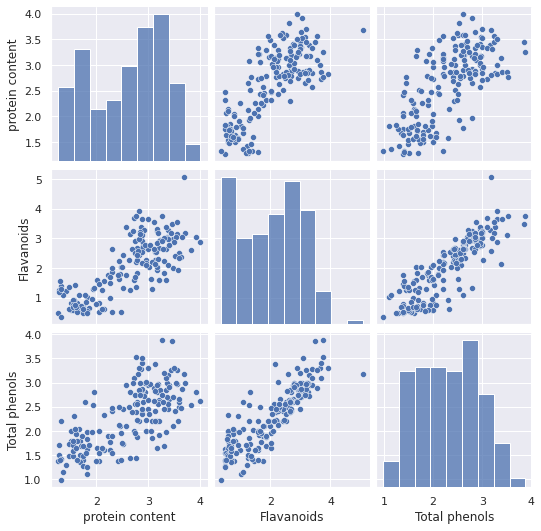

In [48]:
#we take a look at some correlations between attributes
sns.pairplot(pd.concat([x['protein content'], x['Flavanoids'], x['Total phenols']], axis=1))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


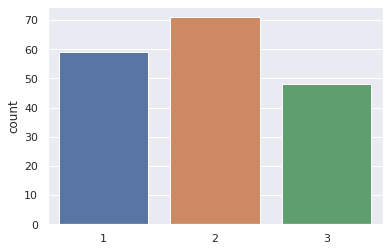

In [49]:
#we take a look at the class representation balance
ax = sns.countplot(list(y['Class']),label="Count")

In [50]:
#split the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [51]:
#fit the RandomForestClassifier on the training dataset
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# clf = RandomForestClassifier(max_depth=6) #uncomment for regular visualization
clf.fit(xTrain, yTrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
#gather all the predictions : B = benign / M = malignent
yPred = clf.predict(xTest)
yPred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 3])

In [53]:
from sklearn.metrics import confusion_matrix

#we create a confusion matrix to check the quality of the predictions
cm = confusion_matrix(yTest, yPred)
cm

array([[19,  0,  0],
       [ 0, 21,  1],
       [ 0,  0, 13]])

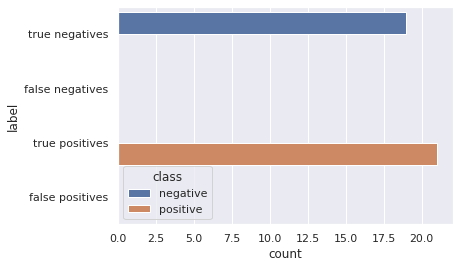

In [54]:
#we display the True/False positives/negatives in a bar plot :

#frst regroup values by labels
confusion_bars = pd.DataFrame(columns=['class', 'label', 'count'])
confusion_bars = confusion_bars.append({'class':'negative', 'label' : 'true negatives', 'count': cm[0][0]}, ignore_index=True)
confusion_bars = confusion_bars.append({'class':'negative', 'label' : 'false negatives', 'count': cm[0][1]}, ignore_index=True)
confusion_bars = confusion_bars.append({'class':'positive', 'label' : 'true positives', 'count': cm[1][1]}, ignore_index=True)
confusion_bars = confusion_bars.append({'class':'positive', 'label' : 'false positives', 'count': cm[1][0]}, ignore_index=True)

#then plot the bar graph
ax = sns.barplot(x="count", y="label", data=confusion_bars, hue='class')
ax

In [55]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(yTest, yPred)
print("Accuracy : "+str(round(acc, 4)*100)+"%")

Accuracy : 98.15%


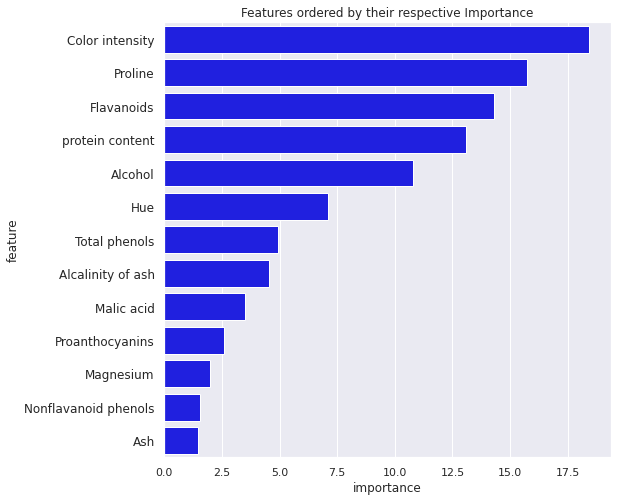

In [56]:
#we import the feature importances and their respective names into a dataframe
importance_df = pd.DataFrame(x.columns, columns=['feature'])
importance_df["importance"] = clf.feature_importances_
importance_df["importance"] = importance_df.apply(lambda row: row.importance*100, axis=1)
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(8,8))
ax = sns.barplot(x=importance_df['importance'], y=importance_df['feature'], color='blue')
ax.set_title('Features ordered by their respective Importance')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.show()

In [57]:
# # very long and useless visualization but can make a nice wallpaper pic

# from IPython.display import HTML, display
# import time

# def progress(value, max=100):
#     return HTML("""
#         <progress
#             value='{value}'
#             max='{max}',
#             style='width: 100%'
#         >
#             {value}
#         </progress>
#     """.format(value=value, max=max))
# out = display(progress(0, 100), display_id=True)


# from sklearn import tree

# multiplier = 1
# fig, ax = plt.subplots(10, 10, figsize=(100*multiplier, 40*multiplier))

# for i in range(0, 10):
#   for j in range(0, 10):
#     iteration = j+i*10
#     tree_plot = tree.plot_tree(clf.estimators_[iteration],
#                 feature_names = x.columns, 
#                 class_names=["M", "B"],
#                 filled = True,
#                 ax=ax[i, j]);
#     # #display every 10 iterations
#     # if (iteration%10 == 0):
#     #   print(str(iteration)+"%")
#     out.update(progress(iteration+1, 100))
    
# plt.show()

In [58]:
#we select parameters with an importance factor > 5
importance_df_top_5 = importance_df[importance_df.importance > 5]
importance_df_top_5

,feature,importance
9,Color intensity,18.435076
12,Proline,15.732998
6,Flavanoids,14.317278
11,protein content,13.079014
0,Alcohol,10.790273
10,Hue,7.098495


In [59]:
#we fit the tree classifier with this new dataset and check accuracy

xTrain2 = xTrain[importance_df_top_5.feature.values]
xTest2 = xTest[importance_df_top_5.feature.values]
clf2 = RandomForestClassifier()
clf2.fit(xTrain2, yTrain)

yPred = clf.predict(xTest)

acc = accuracy_score(yTest, yPred)
print("Accuracy : "+str(round(acc, 4)*100)+"%")

# it is the same.

Accuracy : 98.15%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
